In [1]:
import os 

os.environ["ISISROOT"] = "/usgs/cpkgs/anaconda3_macOS/envs/isis3.8.0"

import pysis
from pysis import isis

import knoten
from knoten import vis

import json

import ale
from ale import util
from ale.drivers.lro_drivers import LroLrocPds3LabelNaifSpiceDriver
from ale.formatters.usgscsm_formatter import to_usgscsm

from IPython.display import Image

import plotly
plotly.offline.init_notebook_mode(connected=True)

/Users/jmapel/miniconda3/envs/knoten/lib/python3.7/site-packages/Ale-0.6.0-py3.7.egg/ale/__init__.py:22: UserWarning:

ALESPICEROOT environment variable not set, Spice Drivers will not function correctly



In [ ]:
url = 'https://pdsimage2.wr.usgs.gov/Missions/Lunar_Reconnaissance_Orbiter/LROC/EDR/LROLRC_0018/DATA/EXT/2013354/NAC/M1142142198RE.IMG'

!wget -N -P data/ {url}
fileName = 'data/' + os.path.split(url)[1]

In [2]:
fileName = 'data/M1142142198RE.IMG'

In [3]:
# Set the output location of the resulting .cub
cub_loc = os.path.splitext(fileName)[0] + '.cub'

try: 
   isis.lronac2isis(from_=fileName, to=cub_loc)
except ProcessError as e:
   print(e.stderr)

try:
    isis.spiceinit(from_=cub_loc, shape='ellipsoid')
except ProcessError as e:
    print(e.stderr)

kernels = ale.util.generate_kernels_from_cube(cub_loc, expand=True)

usgscsm_str = ale.loads(fileName, props={'kernels': kernels}, formatter="usgscsm", verbose=False)

csm_isd = os.path.splitext(fileName)[0] + '.json'
with open(csm_isd, 'w') as isd_file:
    isd_file.write(usgscsm_str)

In [4]:
csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, 10, 50, 600, 600)

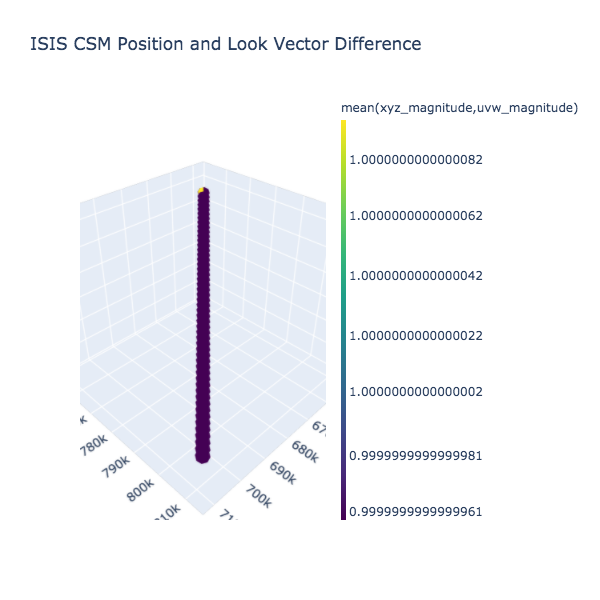

In [5]:
csmisis_diff_lv_plot_bytes = csmisis_diff_lv_plot.to_image(format="png")
csmisis_diff_ephem_plot_bytes = csmisis_diff_ephem_plot.to_image(format="png")
Image(csmisis_diff_lv_plot_bytes)


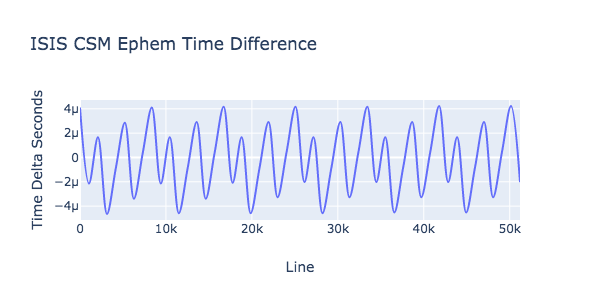

In [6]:
Image(csmisis_diff_ephem_plot_bytes)

In [7]:
external_orientation_data[['diffx', 'diffy', 'diffz', 'diffu', 'diffv', 'diffw']].describe()

,diffx,diffy,diffz,diffu,diffv,diffw
count,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,-6.039254e-07,2.042763e-07,0.000001,-4.127150e-09,5.017379e-09,-4.741241e-10
std,1.969220e-05,1.897589e-05,0.000018,7.446965e-08,7.537137e-08,3.823529e-08
min,-3.681472e-05,-3.461959e-05,-0.000043,-2.192902e-07,-1.616644e-07,-1.615731e-07
25%,-1.519662e-05,-1.390639e-05,-0.000013,-2.808094e-08,-2.468144e-08,-6.494892e-09
50%,-1.204025e-06,-2.980232e-07,0.000001,2.780555e-09,1.213644e-09,-3.676058e-10
75%,1.387298e-05,1.398183e-05,0.000016,3.440942e-08,3.497846e-08,1.679794e-08
max,4.817836e-05,4.738756e-05,0.000034,1.750705e-07,2.470604e-07,6.519280e-08


In [8]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, 10, 50, 500, 500, 0.1)

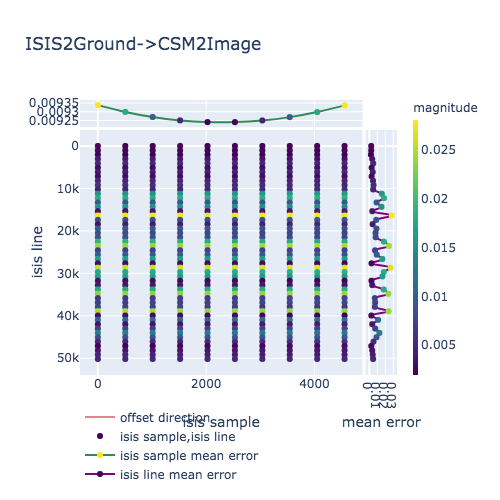

In [9]:
Image(isis2csm_plot.to_image())

In [10]:
isis2csm_data[['diff line', 'diff sample']].describe()

,diff line,diff sample
count,500.000000,500.000000
mean,0.003064,0.000543
std,0.007012,0.008916
min,-0.025718,-0.024690
25%,0.001699,-0.003902
50%,0.002975,0.000144
75%,0.006911,0.004732
max,0.015988,0.024589


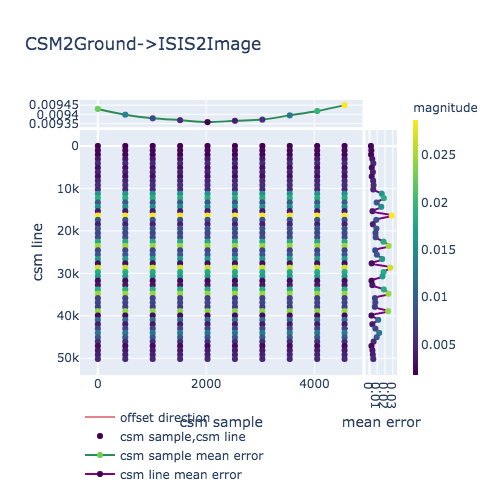

In [11]:
Image(csm2isis_plot.to_image())

In [12]:
csm2isis_data[['diff line', 'diff sample']].describe()

,diff line,diff sample
count,500.000000,500.000000
mean,-0.003147,-0.000607
std,0.007231,0.008911
min,-0.016611,-0.024264
25%,-0.007153,-0.004885
50%,-0.003052,-0.000090
75%,-0.001764,0.003871
max,0.026475,0.023953


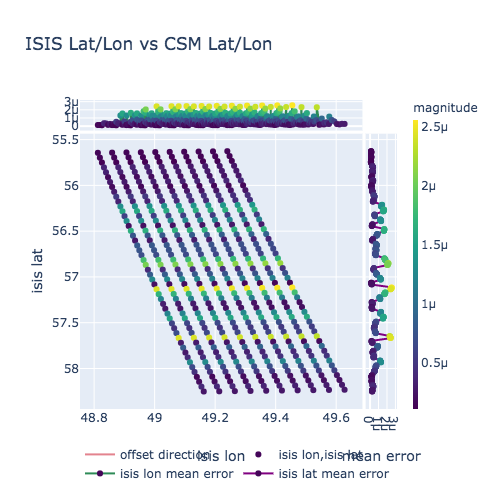

In [13]:
Image(isiscsm_plotlatlon.to_image())

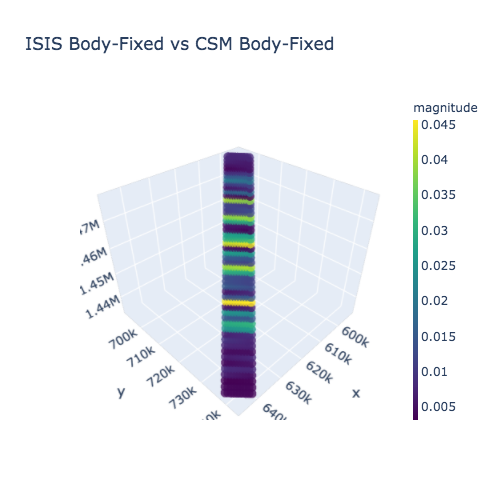

In [14]:
Image(isiscsm_plotbf.to_image())

In [15]:
isiscsm_bfdata[['diffx', 'diffy', 'diffz']].describe()

,diffx,diffy,diffz
count,500.000000,500.000000,500.000000
mean,-0.548781,0.002302,-0.002675
std,1.461300,0.012222,0.006258
min,-2.884510,-0.037162,-0.013550
25%,-1.389212,-0.002593,-0.005950
50%,-0.576474,0.002926,-0.002868
75%,-0.272023,0.006651,-0.001737
max,2.984108,0.030574,0.023743
